In [ ]:
!pip install mlflow==2

In [ ]:
!pip install pycaret

In [ ]:
import mlflow
mlflow.start_run()
mlflow.log_param("parameter name", "value")
mlflow.log_metric("metric name", 1)
mlflow.end_run()

In [ ]:
# set env variables
import os

os.environ['MLFLOW_TRACKING_USERNAME'] = 'Etixi'
os.environ['MLFLOW_TRACKING_PASSWORD'] = '7105226e046f52c659cc559f1014f42e5ae1e461'
os.environ['MLFLOW_TRACKING_URI'] = 'https://dagshub.com/Etixi/customer_churn.mlflow'
os.environ["PYCARET_CUSTOM_LOGGING_LEVEL"] = "CRITICAL"

# set mlflow tracking uri
import mlflow
mlflow.set_tracking_uri("https://dagshub.com/Etixi/customer_churn.mlflow")

In [ ]:
import pycaret
import mlflow
#mlflow.set_tracking_uri("http://localhost:5000")

In [ ]:
import pycaret
pycaret.__version__

'3.0.4'

In [ ]:
import pandas as pd
data = pd.read_csv('final_data.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# initialize setup
from pycaret.classification import *
s = setup(data, target = 'Churn', session_id = 123,
          ignore_features = ['customerID'],
          log_experiment = True,
          experiment_name = 'churn1')

,Description,Value
0,Session id,123
1,Target,Churn
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(7043, 21)"
5,Transformed data shape,"(7043, 41)"
6,Transformed train set shape,"(4930, 41)"
7,Transformed test set shape,"(2113, 41)"
8,Ignore features,1
9,Ordinal features,5


2023/08/26 11:45:22 INFO mlflow.tracking.fluent: Experiment with name 'churn1' does not exist. Creating a new experiment.


In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.8022,0.8472,0.5276,0.6595,0.5849,0.4575,0.4632,1.1060
lr,Logistic Regression,0.8016,0.8439,0.5459,0.6531,0.5940,0.4641,0.4679,1.7070
gbc,Gradient Boosting Classifier,0.8006,0.8481,0.5283,0.6552,0.5839,0.4550,0.4602,1.7580
ridge,Ridge Classifier,0.7994,0.0000,0.5191,0.6555,0.5787,0.4494,0.4552,0.4720
lda,Linear Discriminant Analysis,0.7968,0.8374,0.5543,0.6355,0.5916,0.4572,0.4595,0.5820
lightgbm,Light Gradient Boosting Machine,0.7903,0.8352,0.5330,0.6226,0.5733,0.4356,0.4385,2.0260
rf,Random Forest Classifier,0.7876,0.8218,0.4955,0.6270,0.5524,0.4160,0.4215,1.7780
xgboost,Extreme Gradient Boosting,0.7870,0.8252,0.5345,0.6142,0.5706,0.4301,0.4326,2.1850
et,Extra Trees Classifier,0.7682,0.7922,0.4664,0.5798,0.5159,0.3661,0.3704,1.9740
knn,K Neighbors Classifier,0.7655,0.7497,0.4534,0.5733,0.5059,0.3551,0.3595,1.0450


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
print(best_model)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                   estimator=None, learning_rate=1.0, n_estimators=50,
                   random_state=123)


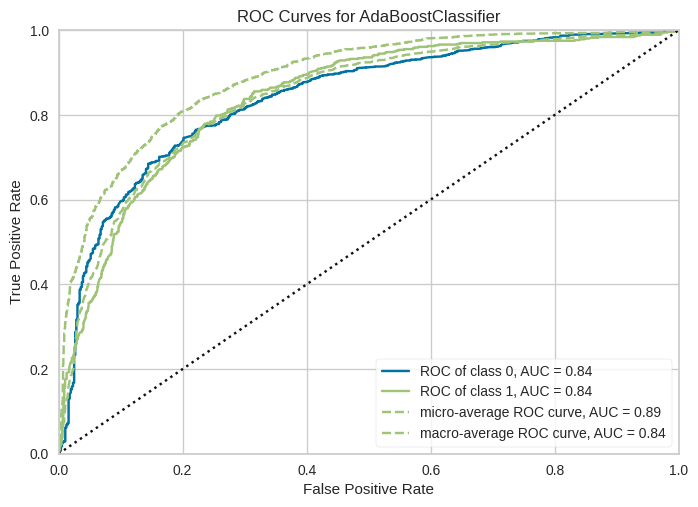

In [ ]:
plot_model(best_model, plot = 'auc')

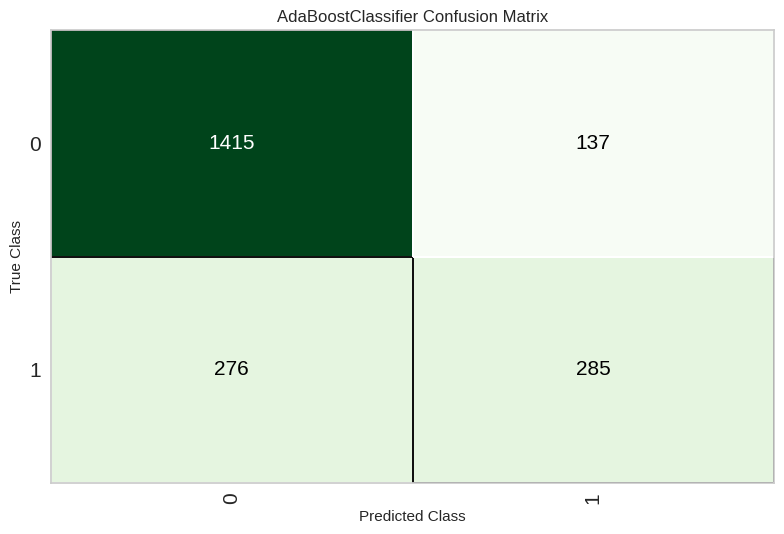

In [ ]:
plot_model(best_model, plot = 'confusion_matrix')

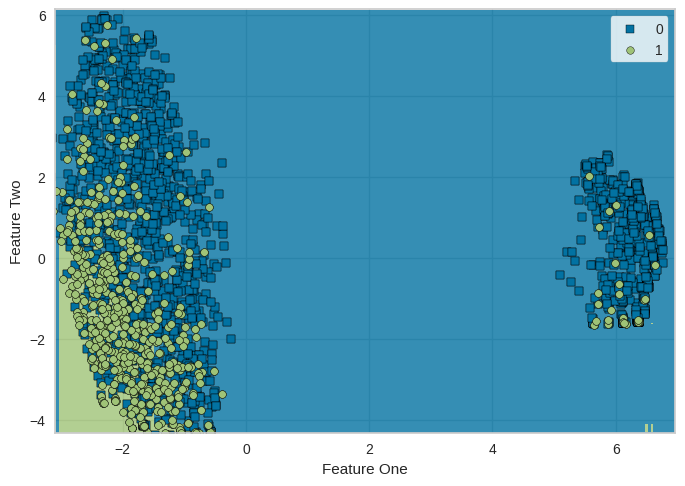

In [ ]:
plot_model(best_model, plot = 'boundary')

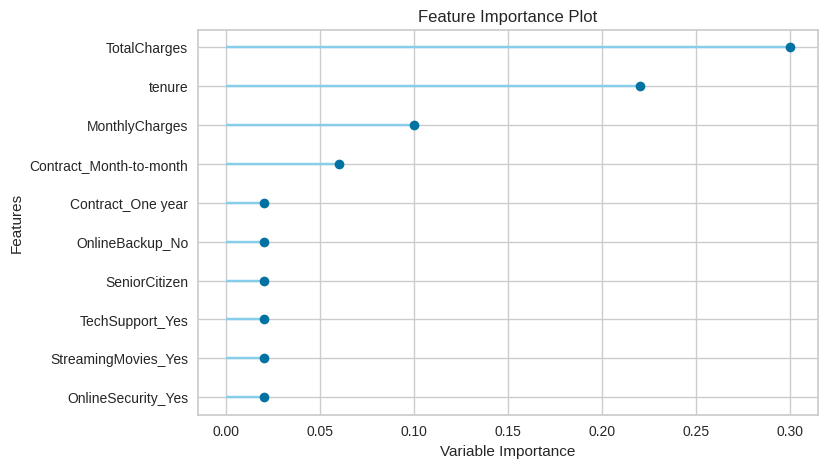

In [ ]:
plot_model(best_model, plot = 'feature')

In [ ]:
# save pipeline
save_model(best_model, 'model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['SeniorCitizen', 'tenure',
                                              'MonthlyCharges', 'TotalCharges'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None...
                                                                     'TechSupport',
                                                                     'StreamingTV',
                                                                     'StreamingMovies',
                   